In [1]:
import numpy as np
!pip install opencv-python
import cv2 #OPEN CV
from matplotlib import pyplot as plt #to show the images

In [2]:
img = cv2.imread(r"C:\Users\w10\Desktop\example.jpg")

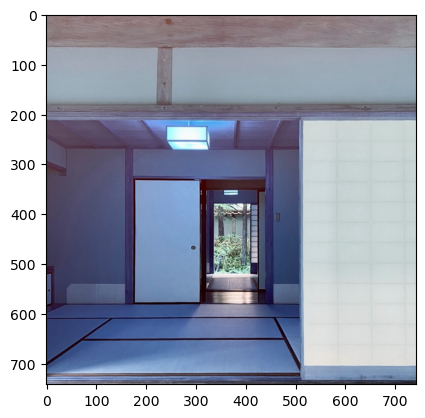

In [3]:
plt.imshow(img)

In [4]:
#DENOISING ATTEMPT
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

In [5]:
#showing the denoised image
#plt.imshow(dst)

In [6]:
# OPEN CV TUTORIAL
#FOLLOWING FROM: https://www.youtube.com/watch?v=WQeoO7MI0Bs&t=7944s&ab_channel=Murtaza%27sWorkshop-RoboticsandAI

In [7]:
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [8]:
#cv2.imshow("Gray", imgGray)
#cv2.waitKey(0)

In [9]:
imgBlur = cv2.GaussianBlur(imgGray,(7,7),1)

In [10]:
#plt.imshow(imgBlur)

In [11]:
imgCanny = cv2.Canny(img,200,200) 

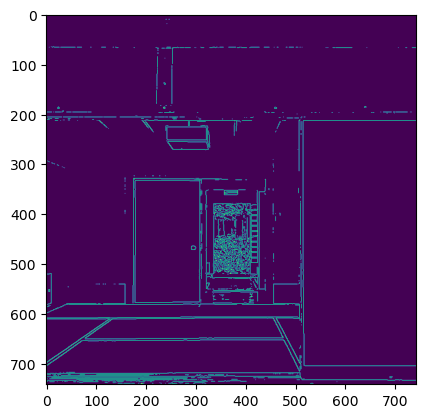

In [12]:
plt.imshow(imgCanny)

In [13]:
kernel = np.ones((3,3) , np.uint8)
imgDial = cv2.dilate(imgCanny, kernel,iterations=3)

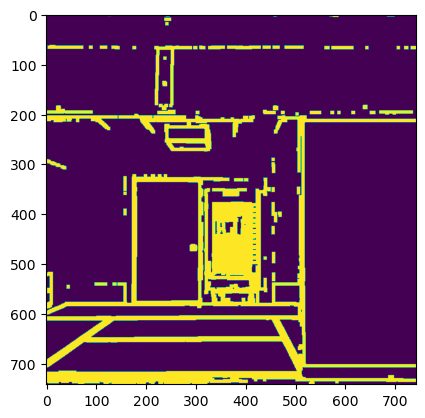

In [14]:
plt.imshow(imgDial)

In [15]:
imgErod = cv2.erode(imgDial , kernel, iterations=1)

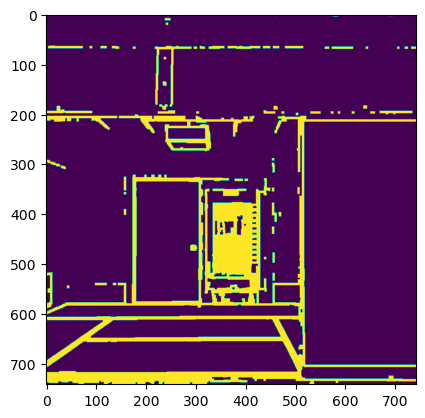

In [16]:
plt.imshow(imgErod)

In [17]:
#Summary: Dilate, Erode, Canny and Gaussian Blur functions with cvtColor

In [18]:
#resizing

In [19]:
print(img.shape)

(742, 742, 3)


In [20]:
imgResize = cv2.resize(img,(100, 50))

In [21]:
#plt.imshow(imgResize)

In [22]:
#cropping
#imgCrop = img[0:200, 200:500]
#plt.imshow(imgCrop)

In [23]:
imgzeros = np.zeros((512, 512 ,3) , np.uint8)

In [24]:
#plt.imshow(imgzeros)

In [25]:
#Blue Green Red (respectively)
#paint green
imgzeros[200:300, 200:300] = 0, 255, 0

In [26]:
#Adding a line below

In [27]:
#cv2.line(imgzeros, (0,0), (250,250), (255,0,0),3)

In [28]:
#cv2.imshow("Colored",imgzeros)
#cv2.waitKey(0)

In [29]:
#Rectangle and circle and putText functions

In [30]:
hor = np.hstack((img,img)) #Horizontal stack, or vertical with vstack!
#cv2.imshow("Horizontal", hor)
#cv2.waitKey(0)

In [31]:
#COLOR DETECTION

In [32]:
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [33]:
#cv2.imshow("HSV", imgHSV)
#cv2.waitKey(0)

In [34]:
# Track Bar is skipped in the tutorial

In [35]:
#Creating mask using inRange function and bitwise_and to add the mask

In [36]:
# SHAPE DETECTION

In [37]:
#Function Credits to Murtaza's Workshop - Robotics and AI on Youtube
# Used for practice only
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver

In [38]:
imgStack = stackImages(0.6, [img, imgGray, imgBlur])

In [39]:
#cv2.imshow("Stack", imgStack)
#cv2.waitKey(0)

In [40]:
imgCanny = cv2.Canny(imgBlur,100,100)
#cv2.imshow("Stack", imgCanny)
#cv2.waitKey(0)

In [41]:
imgcopy = img.copy()

In [42]:
# EXAMPLES
#load images taken of floors

In [43]:
def process_img(image):    
    Gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    Blur = cv2.GaussianBlur(Gray,(7,7),1)
    Canny = cv2.Canny(Blur,150,150) 
    kernel = np.ones((3,3) , np.uint8)
    imgDial = cv2.dilate(Canny, kernel,iterations=3)
    return imgDial

In [71]:
def getContours(img):
    
    img_processed = process_img(img)
    contours, hierarchy = cv2.findContours(img_processed,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    #detect contor
    for i in contours: #look through contours
        area = cv2.contourArea(i) # get Area
        #cv2.drawContours(imgcopy,i,-1,(255,0,0),2) #draw blue
        if area>800: 
            cv2.drawContours(img,i,-1,(0,255,0),3) #draw green
            perimeter = cv2.arcLength(i, True)
            corner_pts_approx = cv2.approxPolyDP(i, 0.02*perimeter, True)
            objCor = len(corner_pts_approx)
            #get coordinates of the bounding boxes
            #x,y,w,h = cv2.boundingRect(corner_pts_approx)
            #cv2.rectangle(imgcopy, (x,y), (x+w,y+h), (0,255,0),2)

In [80]:
f1 = cv2.imread(r"C:\Users\w10\Pictures\Camera Roll\WIN_20211231_17_38_53_Pro.jpg")

In [81]:
getContours(f1)

In [82]:
cv2.imshow("Result", f1)
cv2.waitKey(0)

-1